In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#This method allows Data Augmentation but should only be run on GPU
from keras.applications import VGG16
#Just reuse the bottom convolutional base of VGG16 model as its more generic, top will be related to specific classes so not used
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))


58892288/58889256 [==============================] - 0s 0us/step


In [7]:
#Adding a sequential model to top of conv_base
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

In [8]:
#freeze the conv base. Freezing a layer means preventing their weights from being updated during training
print('This is the number of trainable weights ''before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [9]:
train_dir="/content/drive/MyDrive/Driver_Distraction_Detection/train"
validation_dir="/content/drive/MyDrive/Driver_Distraction_Detection/validation"
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [10]:
#Validation Data Set should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)
#Resize all images to 150x150
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),batch_size=32,class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 4900 images belonging to 10 classes.


In [12]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 1702s 17s/step - loss: 2.3019 - acc: 0.9000 - val_loss: 2.3023 - val_acc: 0.9000
Epoch 2/30
100/100 [==============================] - 869s 9s/step - loss: 2.2982 - acc: 0.9000 - val_loss: 2.3008 - val_acc: 0.9000
Epoch 3/30
100/100 [==============================] - 532s 5s/step - loss: 2.2904 - acc: 0.9000 - val_loss: 2.2926 - val_acc: 0.9000
Epoch 4/30
100/100 [==============================] - 371s 4s/step - loss: 2.2776 - acc: 0.9000 - val_loss: 2.2823 - val_acc: 0.9000
Epoch 5/30
100/100 [==============================] - 254s 3s/step - loss: 2.2577 - acc: 0.9000 - val_loss: 2.2693 - val_acc: 0.9000
Epoch 6/30
100/100 [==============================] - 175s 2s/step - loss: 2.2292 - acc: 0.9000 - val_loss: 2.2601 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 133s 1s/step - loss: 2.1995 - acc: 0.9000 - val_loss: 2.2430 - val_acc: 0.9000
Epoch 8/30
100/100 [==============================] - 112s 1s/step 

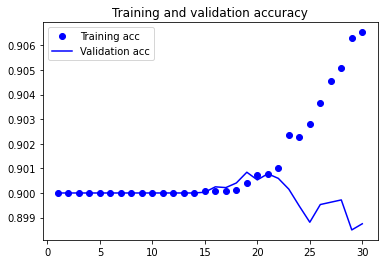

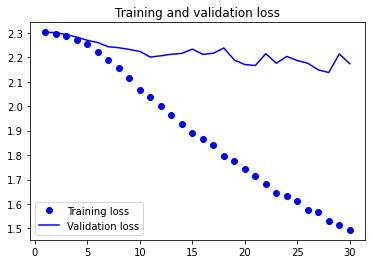

In [13]:
#Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
